# Импорт и установка библиотек

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

import torch
import transformers
from torch import cuda
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaModel, RobertaTokenizer

# Функции

In [ ]:
def cm_plot(y_test, y_pred, y_type):

    cm = confusion_matrix(y_test, y_pred)
    # Normalise
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cmn, cmap='Blues', annot=True, fmt='.2f')
    sns.set(font_scale=1.3)
    plt.title(f'Confusion Matrix of {y_type}')

    return plt.show()

In [ ]:
def statistic(y_pred_test, y_test, y_pred_train, y_train):
    score_table = pd.DataFrame(columns=('train', 'test'))

    b_train = balanced_accuracy_score(y_train, y_pred_train)
    b_test = balanced_accuracy_score(y_test, y_pred_test)
    score_table.loc['balanced_accuracy_score', :] = (b_train, b_test)

    a_train = accuracy_score(y_train, y_pred_train)
    a_test = accuracy_score(y_test, y_pred_test)
    score_table.loc['accuracy_score', :] = (a_train, a_test)

    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    score_table.loc['f1 weighted', :] = (f1_train, f1_test)

    f1_train = f1_score(y_train, y_pred_train, average='micro')
    f1_test = f1_score(y_test, y_pred_test, average='micro')
    score_table.loc['f1 micro', :] = (f1_train, f1_test)

    f1_train = f1_score(y_train, y_pred_train, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')
    score_table.loc['f1 macro', :] = (f1_train, f1_test)

    return score_table

# Загрузка данных

In [ ]:
train['Utterance'] = train['Utterance'].str.replace('\x92','\'')
val['Utterance'] = val['Utterance'].str.replace('\x92','\'')
test['Utterance'] = test['Utterance'].str.replace('\x92','\'')

y_train = train['Emotion'].replace(['anger', 'disgust', 'fear', 'sadness', 'neutral', 'joy', 
                                               'surprise'], 
                                              [0, 1, 2, 3, 4, 5, 6])
y_val = val['Emotion'].replace(['anger', 'disgust', 'fear', 'sadness', 'neutral', 'joy', 
                                               'surprise'], 
                                              [0, 1, 2, 3, 4, 5, 6])
y_test = test['Emotion'].replace(['anger', 'disgust', 'fear', 'sadness', 'neutral', 'joy', 
                                               'surprise'], 
                                              [0, 1, 2, 3, 4, 5, 6])

train.drop(['Sr No.', 'Speaker', 'Emotion', 'Sentiment', 'Dialogue_ID',
       'Utterance_ID', 'Season', 'Episode', 'StartTime', 'EndTime'], axis=1, inplace=True)
val.drop(['Sr No.', 'Speaker', 'Emotion', 'Sentiment', 'Dialogue_ID',
       'Utterance_ID', 'Season', 'Episode', 'StartTime', 'EndTime'], axis=1, inplace=True)
test.drop(['Sr No.', 'Speaker', 'Emotion', 'Sentiment', 'Dialogue_ID',
       'Utterance_ID', 'Season', 'Episode', 'StartTime', 'EndTime'], axis=1, inplace=True)

# Подготовка данных

In [ ]:
parameters = { 
                #secret :)
             }

tokenizer = RobertaTokenizer.from_pretrained('roberta-base', truncation=True, do_lower_case=True)
device = 'cuda' if cuda.is_available() else 'cpu'

In [ ]:
class SentimentData(Dataset):
    def __init__(self, dataframe, y, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = pd.concat([dataframe, y], axis=1)
        self.text = dataframe.Utterance
        self.targets = y
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [ ]:
train_set = SentimentData(train, y_train, tokenizer, parameters['max_len'])
val_set = SentimentData(val, y_val, tokenizer, parameters['max_len'])
test_set = SentimentData(test, y_test, tokenizer, parameters['max_len'])

In [ ]:
train_params = {'batch_size': parameters['batch_size'],
                'shuffle': True,
                'num_workers': 0
                }

val_params = {'batch_size': parameters['batch_size'],
                'shuffle': False,
                'num_workers': 0
                }

test_params = {'batch_size': parameters['batch_size'],
                'shuffle': False,
                'num_workers': 0
                }

train_loader = DataLoader(train_set, **train_params)
val_loader = DataLoader(val_set, **val_params)
test_loader = DataLoader(test_set, **test_params)

In [ ]:
train_check = DataLoader(train_set, **test_params)

# Создание нейронной сети


In [ ]:
class RobertaClass(torch.nn.Module):
    def __init__(self):
        super(RobertaClass, self).__init__()
        #secret :)

    def forward(self, input_ids, attention_mask, token_type_ids):
        #secret :)
        return output

In [ ]:
model = RobertaClass()
model.to(device)

experiment.set_model_graph(model, True)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Обучение модели

In [ ]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=parameters['lr'])
lr_scheduler = StepLR(optimizer, step_size=10, 
                      gamma=parameters['lr_decay'], verbose=True)

Adjusting learning rate of group 0 to 1.0000e-05.


In [ ]:
def calcuate_accuracy(preds, targets):
    n_correct = (preds==targets).sum().item()
    return n_correct

In [ ]:
def train(model, criterion, optimizer, train_dl, val_dl, epochs, experiment, lr_scheduler: StepLR=None):
    
    train_losses = []
    val_losses = []
    
    best_model_params = deepcopy(model.state_dict())
    best_accuracy = 0.0
    
    for epoch in range(epochs):
        print(f'Epoch {epoch+1}/{epochs}\n',
              f'{"--------------------" * 4}')
        
        tr_loss, corrects, nb_tr_steps, nb_tr_examples = 0, 0, 0, 0
        tr_accuracy = 0.0
        
        model.train()
        
        for data in train_dl:
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            
            optimizer.zero_grad()
            outputs = model(ids, mask, token_type_ids) 
            
            loss = criterion(outputs, targets)
            
            tr_loss += loss.item() 
            big_val, big_idx = torch.max(outputs.data, dim=1)
            corrects += calcuate_accuracy(big_idx, targets)
            
            loss.backward()
            optimizer.step()
            
            nb_tr_steps += 1
            nb_tr_examples += targets.size(0)

            
        train_loss = tr_loss/nb_tr_steps
        train_losses.append(train_loss)
        lr_scheduler.step() 
        tr_accuracy = (corrects*100)/len(train_dl.dataset) 
        experiment.log_metric('loss_train', train_loss)

        model.eval() 
        
        vl_loss, corrects, nb_tr_steps, nb_tr_examples = 0, 0, 0, 0 
        
        with torch.no_grad():
            for data in val_dl:
                ids = data['ids'].to(device, dtype = torch.long)
                mask = data['mask'].to(device, dtype = torch.long)
                token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
                targets = data['targets'].to(device, dtype = torch.long)

                outputs = model(ids, mask, token_type_ids).squeeze()
                loss = criterion(outputs, targets)

                vl_loss += loss.item() 
                big_val, big_idx = torch.max(outputs.data, dim=1)
                corrects += calcuate_accuracy(big_idx, targets)

                nb_tr_steps += 1
                nb_tr_examples += targets.size(0)
                
        
        val_loss = vl_loss/nb_tr_steps
        accuracy = (corrects*100)/len(val_dl.dataset)
        experiment.log_metric('loss_val', val_loss)

        val_losses.append(val_loss)
        print(f'Train Loss: {train_loss:.4f} \t Val Loss: {val_loss:.4f} \t  Train Accuracy: {tr_accuracy:.4f} \t Val Accuracy: {accuracy:.4f}\n')
        
        if (accuracy > best_accuracy):
            best_accuracy = accuracy
            best_model_params = deepcopy(model.state_dict())
            
    print('Finished Training and the best accuracy is: {:.4f}'.format(best_accuracy))
    return train_losses, val_losses, best_model_params, best_accuracy

In [ ]:
train_losses, val_losses, best_model_params, best_accuracy = train(
                                                                 model, 
                                                                 loss_function, 
                                                                 optimizer, 
                                                                 train_loader, 
                                                                 val_loader, 
                                                                 parameters['epochs'], 
                                                                 experiment,
                                                                 lr_scheduler)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Epoch 1/10
 --------------------------------------------------------------------------------


/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2345: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2345: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Adjusting learning rate of group 0 to 1.0000e-05.
Train Loss: 1.3729 	 Val Loss: 1.2316 	  Train Accuracy: 54.5900 	 Val Accuracy: 59.3863

Epoch 2/10
 --------------------------------------------------------------------------------
Adjusting learning rate of group 0 to 1.0000e-05.
Train Loss: 1.0972 	 Val Loss: 1.1889 	  Train Accuracy: 64.4509 	 Val Accuracy: 61.7329

Epoch 3/10
 --------------------------------------------------------------------------------
Adjusting learning rate of group 0 to 1.0000e-05.
Train Loss: 1.0033 	 Val Loss: 1.1443 	  Train Accuracy: 67.5143 	 Val Accuracy: 62.0036

Epoch 4/10
 --------------------------------------------------------------------------------
Adjusting learning rate of group 0 to 1.0000e-05.
Train Loss: 0.9225 	 Val Loss: 1.1542 	  Train Accuracy: 70.8379 	 Val Accuracy: 62.2744

Epoch 5/10
 --------------------------------------------------------------------------------
Adjusting learning rate of group 0 to 1.0000e-05.
Train Loss: 0.8234

In [ ]:
model.load_state_dict(best_model_params)

<All keys matched successfully>

# Результаты

In [ ]:
def get_predicts(model, loader, _type_):
    
    model.eval()
    n_correct = 0; n_wrong = 0; total = 0; tr_loss=0; nb_tr_steps=0; nb_tr_examples=0
    y_pred = []
    
    with torch.no_grad():
        for _, data in (enumerate(loader, 0)):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            outputs = model(ids, mask, token_type_ids).squeeze()
            
            y_pred.extend(torch.argmax(outputs, dim=1).cpu().numpy())   
            
            loss = loss_function(outputs, targets)
            tr_loss += loss.item()
            big_val, big_idx = torch.max(outputs.data, dim=1)
            n_correct += calcuate_accuracy(big_idx, targets)

            nb_tr_steps += 1
            nb_tr_examples+=targets.size(0)
            
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"{_type_} Loss Epoch: {epoch_loss}")
    print(f"{_type_} Accuracy Epoch: {epoch_accu}")
    print()
    
    return y_pred


In [ ]:
y_pred = get_predicts(model, test_loader, 'Test')
y_pred_train = get_predicts(model, train_check, 'Train')
y_pred_val = get_predicts(model, val_loader, 'Validation')

Test Loss Epoch: 1.048206552863121
Test Accuracy Epoch: 65.32567049808429

Train Loss Epoch: 0.748645941194254
Train Accuracy Epoch: 76.31394533987387

Validation Loss Epoch: 1.154245058127812
Validation Accuracy Epoch: 62.27436823104693



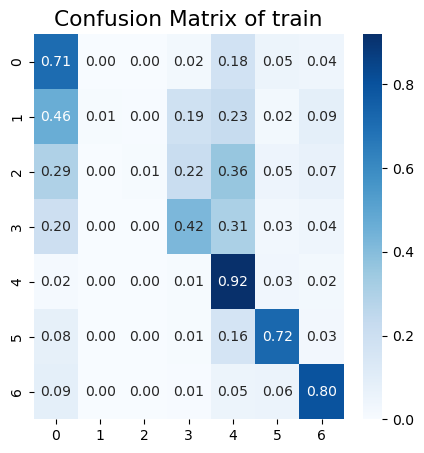

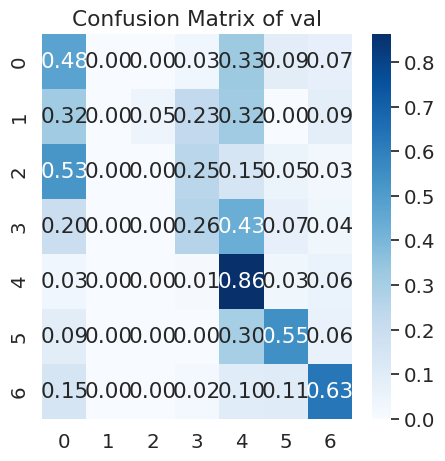

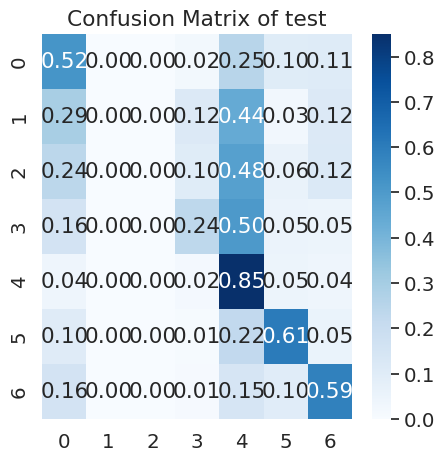

In [ ]:
cm_plot(y_train, y_pred_train, 'train')
cm_plot(y_val, y_pred_val, 'val')
cm_plot(y_test, y_pred, 'test')

In [ ]:
statistic(y_pred, y_test, y_pred_train, y_train)

,train,test
balanced_accuracy_score,0.511542,0.399841
accuracy_score,0.763139,0.653257
f1 weighted,0.740213,0.627947
f1 micro,0.763139,0.653257
f1 macro,0.507432,0.398555


# Сохранение модели

In [ ]:
output_model_file = 'pytorch_roberta_sentiment_65.bin'
output_vocab_file = './'

model_to_save = model
torch.save(model_to_save, output_model_file)
tokenizer.save_vocabulary(output_vocab_file)

print('All files saved')

All files saved


In [ ]:
import os
from IPython.display import FileLink
os.chdir(r'/kaggle/working')

!tar -czf pytorch_roberta_sentiment_65.tar.gz pytorch_roberta_sentiment_65.bin

FileLink(r'pytorch_roberta_sentiment_65.tar.gz')